<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB05_2403a52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.matcher import Matcher


In [16]:
# Load the arXiv abstracts dataset and preview its structure
df = pd.read_csv("/content/arxiv_data.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (51774, 3)


,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [17]:
# Extract non-empty research abstracts from the dataset and store them as a list
abstracts = df['summaries'].dropna().tolist()


In [18]:
# Load the pre-trained English spaCy language model for NLP processing
nlp = spacy.load("en_core_web_sm")


In [19]:
# Process the first 500 abstracts through the spaCy pipeline for efficient NLP analysis
docs = list(nlp.pipe(abstracts[:500]))  # limit for performance


In [20]:
# Tokenize the first abstract and extract the first 30 tokens excluding punctuation
doc = docs[0]

tokens = [token.text for token in doc if not token.is_punct]
tokens[:30]


['Stereo',
 'matching',
 'is',
 'one',
 'of',
 'the',
 'widely',
 'used',
 'techniques',
 'for',
 'inferring',
 'depth',
 'from',
 '\n',
 'stereo',
 'images',
 'owing',
 'to',
 'its',
 'robustness',
 'and',
 'speed',
 'It',
 'has',
 'become',
 'one',
 'of',
 'the',
 'major',
 '\n']

In [21]:
# Extract noun phrases from all processed abstracts and find the top 10 most frequent ones
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases)
top_noun_phrases = np_freq.most_common(10)

top_noun_phrases


[('we', 1295),
 ('which', 425),
 ('that', 326),
 ('it', 281),
 ('this paper', 195),
 ('the-art', 191),
 ('image segmentation', 148),
 ('our method', 115),
 ('-', 99),
 ('this work', 98)]

In [22]:
# Extract named entities from abstracts and compute frequency of each entity type
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))

entity_df = pd.DataFrame(entities, columns=["Entity", "Label"])
entity_freq = entity_df['Label'].value_counts()

entity_freq


,count
Label,
ORG,1353
CARDINAL,761
PERSON,184
PERCENT,150
ORDINAL,143
GPE,113
DATE,80
NORP,68
PRODUCT,35


In [23]:
# Define rule-based patterns using spaCy Matcher to identify technical terms in abstracts
matcher = Matcher(nlp.vocab)

pattern1 = [
    {"POS": "ADJ"},
    {"POS": "NOUN"}
]

pattern2 = [
    {"POS": "NOUN"},
    {"POS": "NOUN"}
]

matcher.add("TECH_TERM", [pattern1, pattern2])


In [24]:
# Apply matcher patterns to extract frequent technical terms from the abstracts
matched_terms = []

for doc in docs:
    matches = matcher(doc)
    for match_id, start, end in matches:
        matched_terms.append(doc[start:end].text.lower())

Counter(matched_terms).most_common(10)


[('image segmentation', 525),
 ('medical image', 202),
 ('semantic segmentation', 122),
 ('deep learning', 117),
 ('neural networks', 77),
 ('segmentation tasks', 69),
 ('neural network', 58),
 ('experimental results', 56),
 ('computer vision', 51),
 ('medical images', 50)]

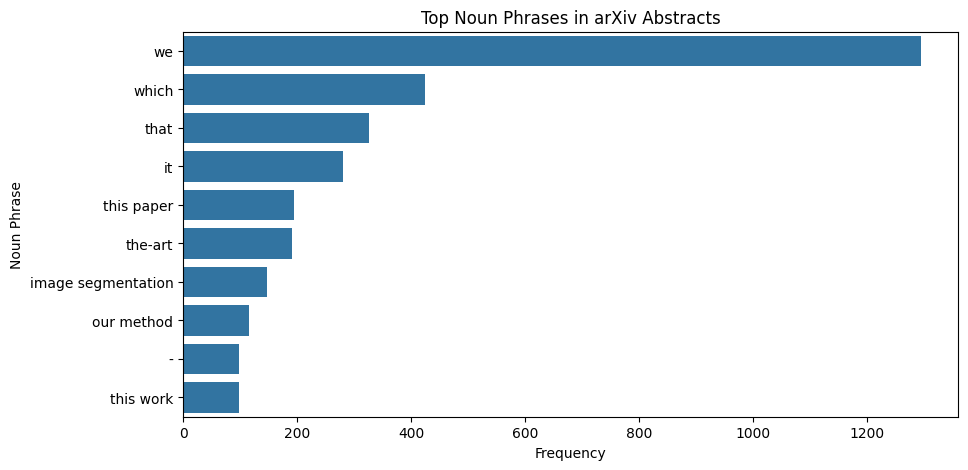

In [25]:
# Visualize the top 10 most frequent noun phrases using a bar chart
phrases, counts = zip(*top_noun_phrases)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(phrases))
plt.title("Top Noun Phrases in arXiv Abstracts")
plt.xlabel("Frequency")
plt.ylabel("Noun Phrase")
plt.show()


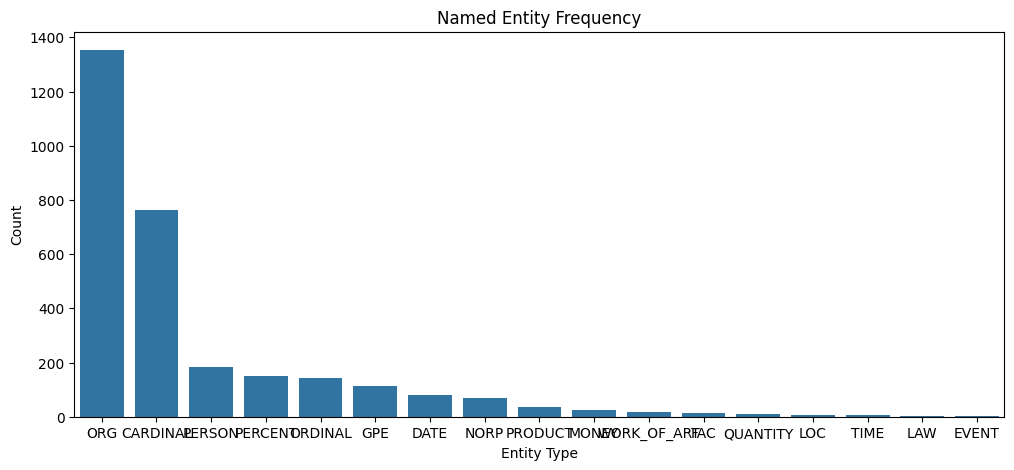

In [30]:
# Visualize the frequency distribution of named entity types using a bar chart
plt.figure(figsize=(12,5))
sns.barplot(x=entity_freq.index, y=entity_freq.values)
plt.title("Named Entity Frequency")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.show()
